In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import torch

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [6]:
env_info = env.reset(train_mode=True)[brain_name]      
states = env_info.vector_observations                  
scores = np.zeros(num_agents)                          
while True:
    actions = np.random.randn(num_agents, action_size) 
    actions = np.clip(actions, -1, 1)                  
    env_info = env.step(actions)[brain_name]           
    next_states = env_info.vector_observations         
    rewards = env_info.rewards                         
    dones = env_info.local_done                        
    scores += env_info.rewards                         
    states = next_states                               
    if np.any(dones):                                  
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

In [ ]:
env.close()

In [5]:
from ddpg_agent import Agent

In [6]:
def ddpg(n_episodes=1000, max_t=10000, print_every=100):
    
    scores = []
    scores_deque = deque(maxlen=print_every)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        agent.reset()
        state = env_info.vector_observations[0]           
        score = 0
        
        for t in range(max_t):
            action = agent.act(state)          
       
            env_info = env.step(action)[brain_name]        
            next_state = env_info.vector_observations[0]   
            reward = env_info.rewards[0]                   
            done = env_info.local_done[0]                  
            agent.step(state, action, reward, next_state, done) 
            score += reward                                
            state = next_state                             
            if done:                                       
                break
        
        scores_deque.append(score)       
        scores.append(score)             

        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores

In [7]:
agent = Agent(state_size=state_size, action_size=action_size, random_seed=42)

In [8]:
scores = ddpg(n_episodes = 500)

Episode 100	Average Score: 3.62
Episode 200	Average Score: 20.60
Episode 257	Average Score: 30.05
Environment solved in 257 episodes!	Average Score: 30.05


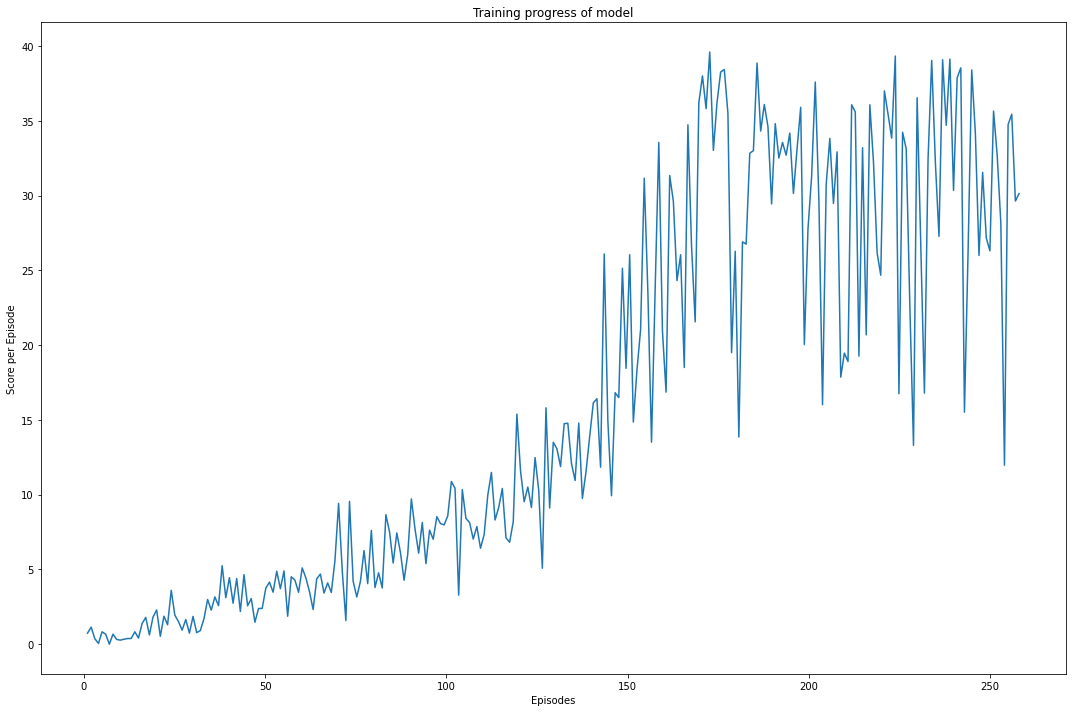

In [9]:
n_episodes = len(scores)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(np.linspace(1,n_episodes+1, n_episodes),scores)
ax.set_xlabel('Episodes')
ax.set_ylabel('Score per Episode')
ax.set_title('Training progress of model');

fig.tight_layout()
fig.savefig("plot.jpg")
